# Q1: What is Anomaly Detection? Explain its types.
# Anomaly Detection is the process of identifying data points that deviate
# significantly from normal patterns.
#
# Point Anomalies:
# Individual data points that are abnormal.
# Example: A credit card transaction of ₹10,00,000 when usual spending is ₹5,000.
#
# Contextual Anomalies:
# Data points that are anomalous only in a specific context.
# Example: High electricity usage at midnight but normal during daytime.
#
# Collective Anomalies:
# A group of related data points that together form an anomaly.
# Example: A sudden drop in sensor readings over a time window.


# Q2: Comparison of Isolation Forest, DBSCAN, and Local Outlier Factor (LOF)
# Isolation Forest:
# - Randomly isolates observations
# - Efficient for large, high-dimensional datasets
# - Suitable for real-time anomaly detection
#
# DBSCAN:
# - Density-based clustering
# - Detects anomalies as noise points
# - Best for spatial and non-linear data
#
# LOF:
# - Measures local density deviation
# - Effective when anomalies are relative to local neighborhoods
# - Sensitive to parameter tuning


# Q3: Key components of a Time Series
# Trend: Long-term increase or decrease (e.g., rising airline passengers yearly)
# Seasonality: Repeating patterns at fixed intervals (e.g., higher sales every summer)
# Cyclic: Long-term oscillations without fixed period (e.g., economic cycles)
# Residual/Noise: Random variation unexplained by other components


# Q4: Stationarity in Time Series
# A stationary series has constant mean, variance, and autocorrelation over time.
#
# Testing stationarity:
# - Augmented Dickey-Fuller (ADF) test
#
# Transforming non-stationary data:
# - Differencing
# - Log transformation
# - Seasonal differencing


# Q5: Differences between AR, MA, ARIMA, SARIMA, SARIMAX
# AR (AutoRegressive): Uses past values
# MA (Moving Average): Uses past errors
# ARIMA: AR + MA + differencing
# SARIMA: ARIMA with seasonality
# SARIMAX: SARIMA with external variables (exogenous features)
#
# Q10 (Theory): Power grid real-time workflow
# - Anomaly Detection: Isolation Forest for streaming, LOF for local spikes
# - Forecasting: SARIMAX using weather as exogenous variables
# - Monitoring: Rolling accuracy, retraining, drift detection
# - Business impact: Prevent outages, optimize energy supply, reduce costs

/tmp/ipython-input-1827474204.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(


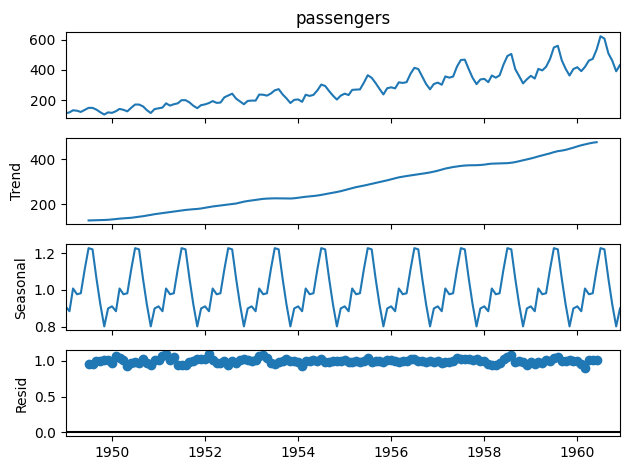

In [3]:
# Q6: Load time series dataset, plot original series,
# and decompose into trend, seasonality, and residuals

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers-equivalent dataset (monthly airline passengers)
df = sns.load_dataset("flights")

# Convert to time series format
df['Month'] = pd.to_datetime(
    df['year'].astype(str) + "-" + df['month'].astype(str)
)
df.set_index('Month', inplace=True)

# Decompose time series
decomposition = seasonal_decompose(
    df['passengers'],
    model='multiplicative',
    period=12
)

# Plot results
decomposition.plot()
plt.tight_layout()

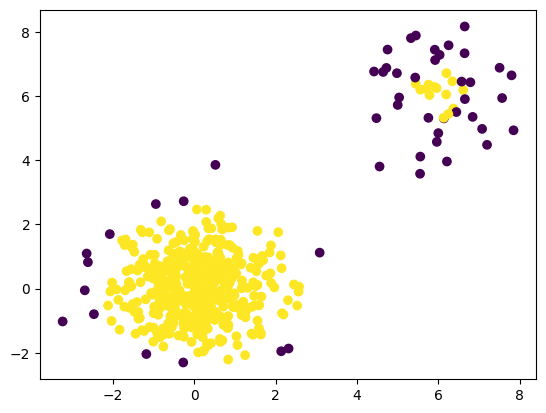

In [4]:
# Q7: Isolation Forest anomaly detection with visualization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

np.random.seed(42)
X = np.random.randn(500, 2)
X[450:] += 6  # Inject anomalies

iso = IsolationForest(contamination=0.1, random_state=42)
labels = iso.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)

/tmp/ipython-input-3915836147.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


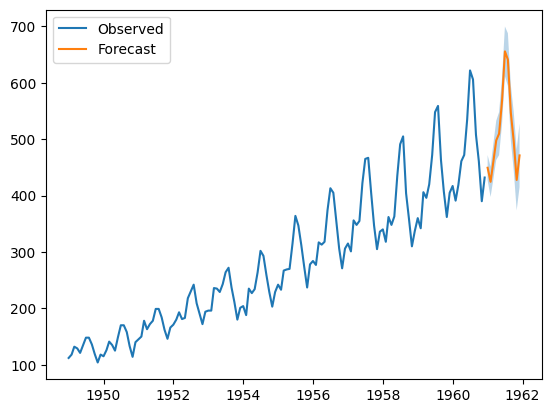

In [6]:
# Q8: SARIMA forecasting on airline passengers dataset

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = sns.load_dataset("flights")

# Prepare time series
df['Month'] = pd.to_datetime(
    df['year'].astype(str) + "-" + df['month'].astype(str)
)
df.set_index('Month', inplace=True)

ts = df['passengers']

# Train SARIMA model
model = SARIMAX(
    ts,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot results
plt.figure()
plt.plot(ts, label="Observed")
plt.plot(forecast.predicted_mean, label="Forecast")
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    alpha=0.3
)
plt.legend()

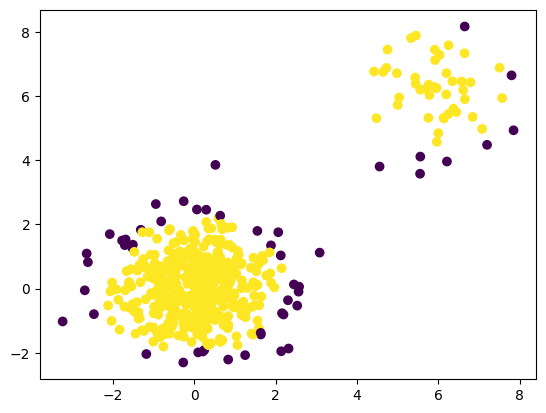

In [7]:
# Q9: Local Outlier Factor anomaly detection

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
labels_lof = lof.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_lof)

In [9]:
# Q10: forecasting workflow

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('anomaly_detector', IsolationForest(contamination=0.05))
])

pipeline.fit(X)
anomaly_scores = pipeline.named_steps['anomaly_detector'].decision_function(X)